In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df)

In [7]:
# Create a DataFrame with the scaled data
scaled_data_df = pd.DataFrame(scaled_data, columns=market_data_df.columns)

# Copy the crypto names from the original data
crypto_names = market_data_df.index

# Set the coinid column as index
scaled_data_df.index = crypto_names

# Display sample data
scaled_data_df.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    # 2. Fit the model to the data using the scaled DataFrame
    kmeans.fit(scaled_data_df)
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


<Axes: title={'center': 'Inertia Values According To K'}, xlabel='k'>

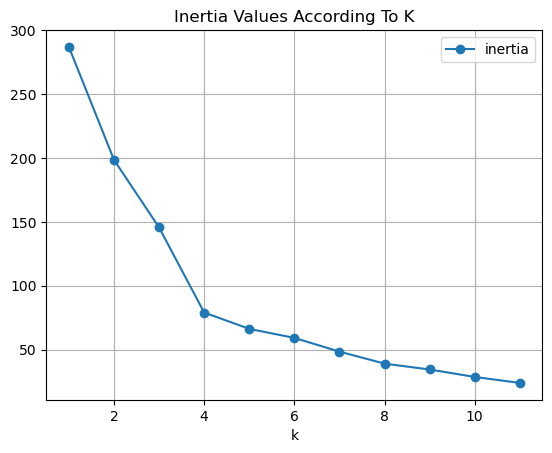

In [12]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot(x="k", y="inertia", kind="line", marker = 'o', title="Inertia Values According To K", grid=True)


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4 is the best value for k considering the elbow curve starts to flatten out significantly at that point. 

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [13]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans_model = KMeans(n_clusters=best_k, random_state=0)

In [23]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_data_df)

KMeans(n_clusters=4, random_state=0)

In [29]:
scaled_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [24]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_predictions = kmeans_model.predict(scaled_data_df)

# View the resulting array of cluster values.
cluster_predictions

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [39]:
# Create a copy of the DataFrame
market_data_with_clusters = scaled_data_df.copy()

In [42]:
# Add a new column to the DataFrame with the predicted clusters
market_data_with_clusters['Cluster'] = cluster_predictions

# Display sample data
market_data_with_clusters.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


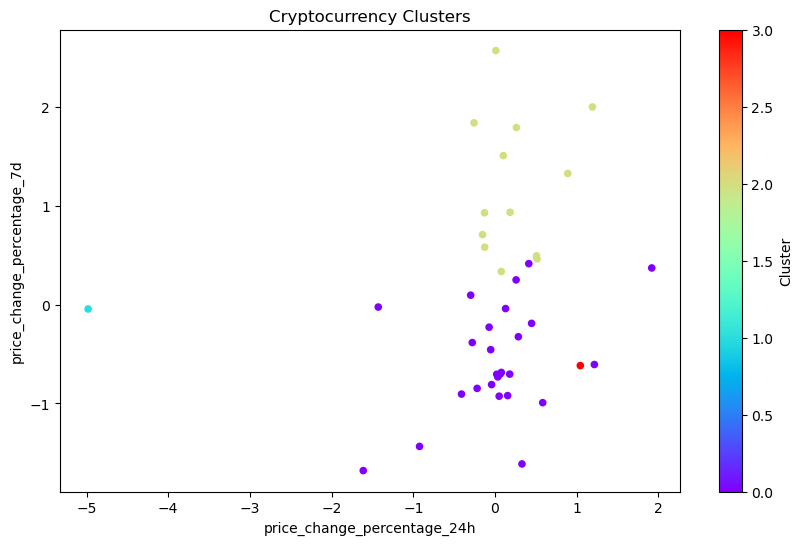

In [84]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

scatter_plot = market_data_with_clusters.plot(
    kind='scatter',
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='Cluster', 
    colormap='rainbow',  
    title='Cryptocurrency Clusters',
    figsize=(10, 6)
)


### Optimize Clusters with Principal Component Analysis.

In [46]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [58]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_transformed_data = pca_model.fit_transform(scaled_data_df)
pca_df = pd.DataFrame(data=pca_transformed_data)

# View the first five rows of the DataFrame. 
pca_array = pca_df.head(5).to_numpy()
print(pca_array)

[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]]


In [59]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
# After fitting the PCA model, retrieve the explained variance
explained_variance = pca_model.explained_variance_ratio_
print(explained_variance)

[0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**  Total explained variance = 0.3719856 + 0.34700813 + 0.17603793 = 0.89503166

In [62]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
# Creating a DataFrame with the PCA data
pca_names_df = pd.DataFrame(data=pca_transformed_data, columns=['PCA 1', 'PCA 2', 'PCA 3'])

# Copy the crypto names from the original data
pca_names_df['coin_id'] = market_data_df.index

# Set the coinid column as index
pca_names_df.set_index('coin_id', inplace=True)

# Display sample data
pca_names_df.head(10)

,PCA 1,PCA 2,PCA 3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [63]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 12)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    # 2. Fit the model to the data using PCA DataFrame.
    kmeans.fit(pca_names_df)
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'Inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

,k,Inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901
5,6,31.749005
6,7,28.031869
7,8,19.451747
8,9,13.814082
9,10,10.630648


<Axes: title={'center': 'Inertia Values According To K'}, xlabel='K', ylabel='Inertia'>

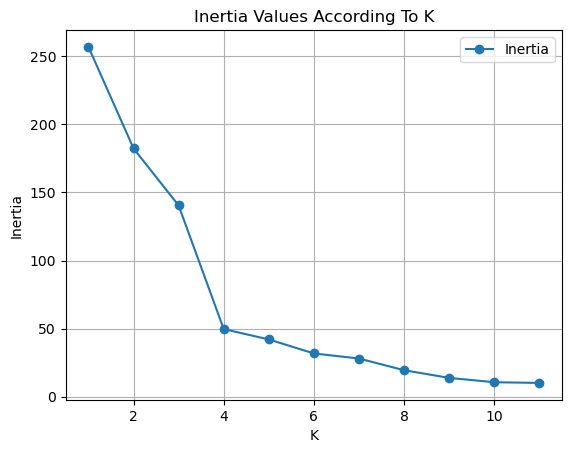

In [67]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot(x='k', y='Inertia', kind='line', marker = 'o', title='Inertia Values According To K', xlabel='K', ylabel='Inertia', grid = 'on')

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k is 4 considering where the elbow curve starts to flatten out significantly at that point.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No it doesn't differ from the best k value found using the original data since it was also 4

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [68]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=0)

In [70]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(pca_names_df)

KMeans(n_clusters=4, random_state=0)

In [72]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_predictions = kmeans_model.predict(pca_names_df)

# Print the resulting array of cluster values.
print(cluster_predictions)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [74]:
# Create a copy of the DataFrame with the PCA data
market_data_clusters = pca_names_df.copy()

# Add a new column to the DataFrame with the predicted clusters
market_data_clusters['cryto_cluster'] = cluster_predictions

# Display sample data
market_data_clusters.head(5)

,PCA 1,PCA 2,PCA 3,cryto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


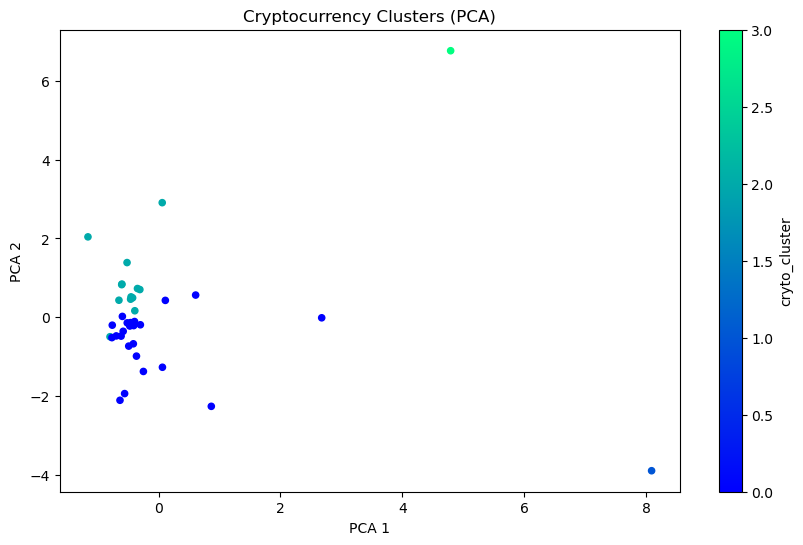

In [86]:
scatter_plot = market_data_clusters.plot(
    kind='scatter',
    x='PCA 1',
    y='PCA 2',
    c='cryto_cluster',  # Use the 'Cluster' column for colors
    colormap='winter',  # Color map for better visualization
    title='Cryptocurrency Clusters (PCA)',
    figsize=(10, 6)
)

### Determine the Weights of Each Feature on each Principal Component

In [89]:
# Use the columns from the original scaled DataFrame as the index.
pca_components = pca_model.components_

# Create a DataFrame with the PCA components using scaled_data_df columns as index
pca_weights_df = pd.DataFrame(
    data=pca_components, 
    columns=scaled_data_df.columns,  # Set the original feature names as columns
    index=[f'Principal Component {i+1}' for i in range(pca_components.shape[0])]  # Name the components
)

pca_weights_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
Principal Component 1,-0.416728,-0.102432,-0.009162,0.191523,0.320365,0.594468,0.568379
Principal Component 2,0.358162,0.227432,0.540415,0.562182,0.434040,0.027735,-0.150789
Principal Component 3,-0.218795,0.787670,0.349534,-0.181744,-0.361377,0.039733,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:**

PCA 1:
  * strongest negative influence: price_change_percentage_24h (-0.416728)
  * strongest positive influence : price_change_percentage_200d (0.594468)

PCA 2:
  * strongest negative influence: price_change_percentage_1y (-0.150789)
  * strongest positive influence : price_change_percentage_30d (0.562182	)

PCA 3:
  * strongest negative influence: price_change_percentage_60d (-0.361377)
  * strongest positive influence : price_change_percentage_7d (0.787670)
    